In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_excel("CW_Data.xlsx")
display(data)


,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


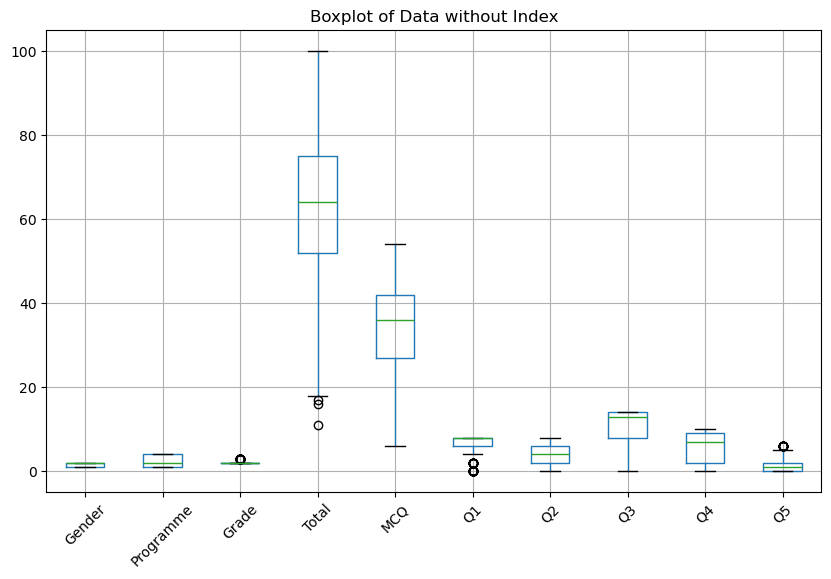

In [4]:
data0 = data.drop(columns=['Index'])

plt.figure(figsize=(10, 6))
data0.boxplot()
plt.title('Boxplot of Data without Index')
plt.xticks(rotation=45)
plt.show()


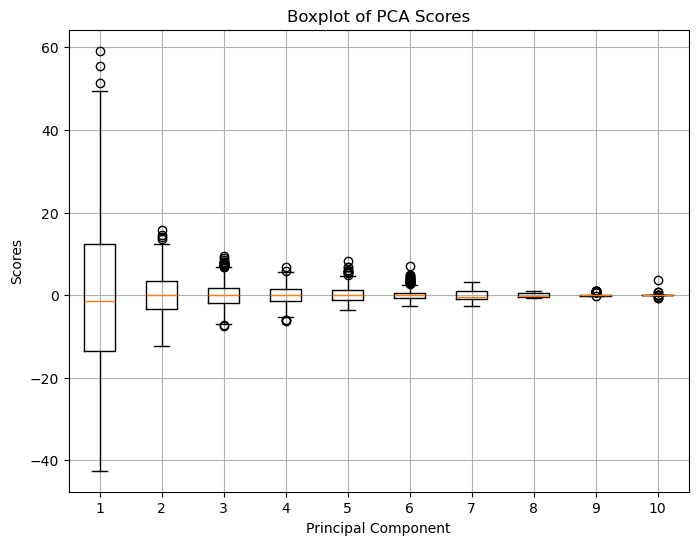

In [5]:
data = data.iloc[:, 1:]

# 应用PCA
pca = PCA()
score = pca.fit_transform(data)

# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(score)
plt.title('Boxplot of PCA Scores')
plt.xlabel('Principal Component')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

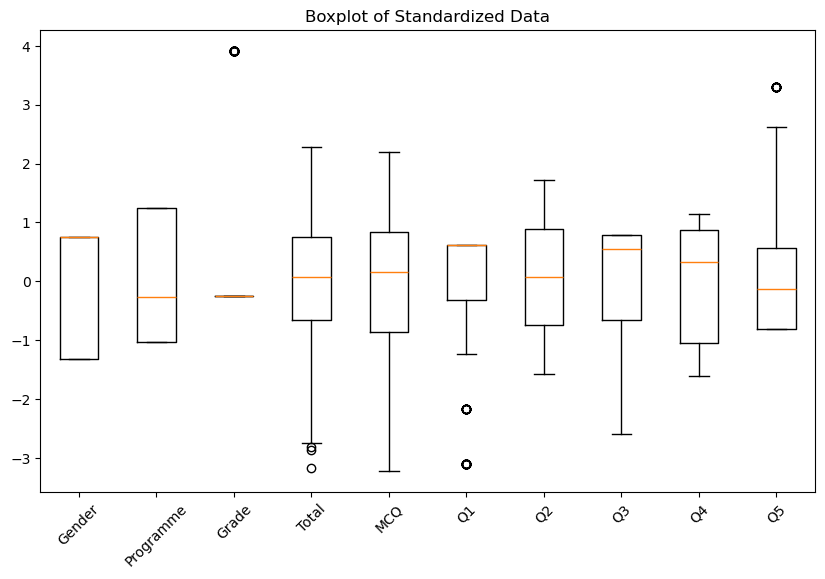

In [10]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data0)

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(scaled_data, labels=data0.columns)
plt.title('Boxplot of Standardized Data')
plt.xticks(rotation=45)
plt.show()

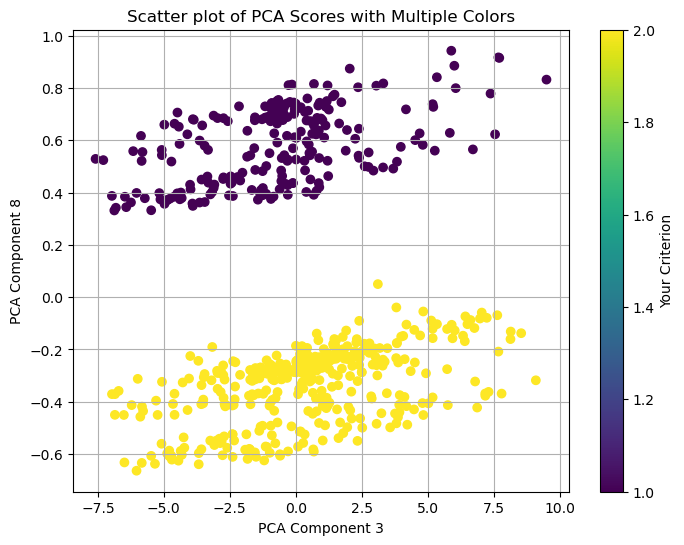

In [6]:
#找最好的特征组合
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 2], score[:, 7], c=data['Gender'], cmap='viridis')
plt.title('Scatter plot of PCA Scores with Multiple Colors')
plt.xlabel('PCA Component 3')
plt.ylabel('PCA Component 8')
plt.colorbar(label='Your Criterion')
plt.grid(True)
plt.show()

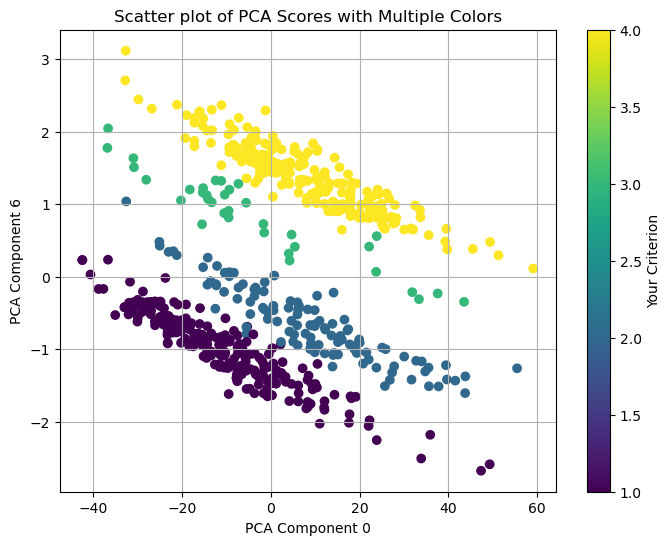

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 6], c=data['Programme'], cmap='viridis')
plt.title('Scatter plot of PCA Scores with Multiple Colors')
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 6')
plt.colorbar(label='Your Criterion')
plt.grid(True)
plt.show()

In [8]:
# 获取主成分的加载向量
loadings = pca.components_

# 创建 DataFrame 显示加载向量
loadings_df = pd.DataFrame(loadings, columns=data.columns)

# 显示加载向量表格
print("Loadings of Original Features in Principal Components:")
print(loadings_df)


Loadings of Original Features in Principal Components:
     Gender  Programme     Grade     Total       MCQ        Q1        Q2  \
0 -0.001555   0.030124 -0.000192 -0.875801 -0.430780 -0.057772 -0.083417   
1  0.002661   0.006364  0.000869 -0.246765  0.778712 -0.095215 -0.098829   
2  0.024793  -0.042268  0.003335  0.060282 -0.102346  0.099581  0.076182   
3  0.008487  -0.025055 -0.010229  0.121206 -0.201826  0.389598  0.674710   
4  0.005570  -0.058561  0.004961 -0.037188  0.026361 -0.813392  0.563733   
5  0.029460  -0.054064  0.009279  0.093714 -0.117476 -0.131261 -0.250702   
6 -0.092982   0.990032  0.031109  0.034983 -0.004666 -0.036372  0.045225   
7 -0.990936  -0.098106  0.085851 -0.000288 -0.001757  0.004284  0.002190   
8  0.088097  -0.021827  0.995679 -0.003536  0.001636  0.012685  0.007513   
9 -0.006635   0.004471  0.007573  0.377298 -0.377232 -0.381517 -0.373476   

         Q3        Q4        Q5  
0 -0.138353 -0.123653 -0.041999  
1 -0.441134 -0.341506 -0.051058  
2 -0.7

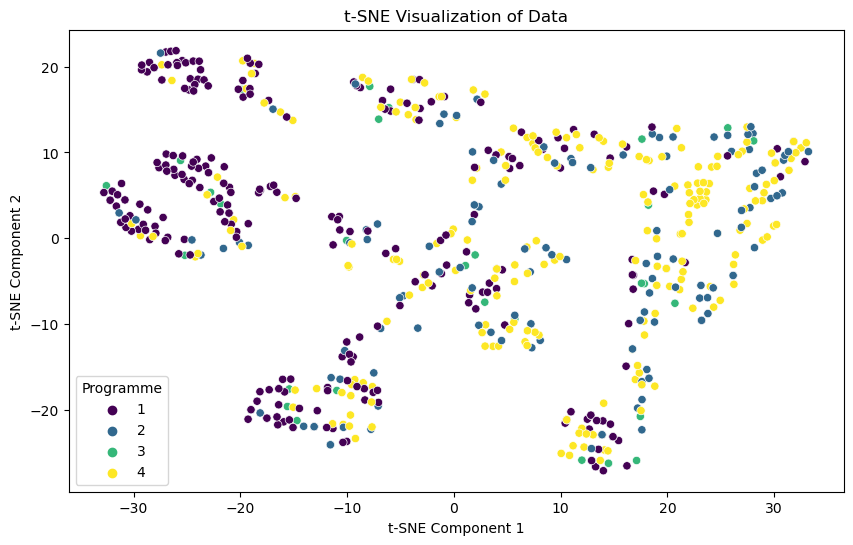

In [9]:
# 假设 data 是包含 Programme 和给定特征集合的数据集
# 筛选数据
import seaborn as sns
from sklearn.manifold import TSNE
data_subset = data[['Programme', 'Q2', 'Q4' ,'Total', 'Q3']]

# 对数据进行预处理，例如处理缺失值或标准化
from sklearn.preprocessing import StandardScaler

# 创建一个标准化器
scaler = StandardScaler()

# 选择需要标准化的列
columns_to_scale = ['Q2', 'Q4', 'Total', 'Q3']

# 对选择的列进行标准化处理
data_scaled = scaler.fit_transform(data_subset[columns_to_scale])

# 将标准化后的数据转换为 DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)

# 将 Programme 列添加回 DataFrame
data_scaled_df['Programme'] = data_subset['Programme']


# 对每个 Programme 类别的数据应用 t-SNE 算法进行降维
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data_scaled_df.drop(columns=['Programme']))

# 将 t-SNE 降维后的数据点绘制成散点图，根据 Programme 类别进行着色
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data_scaled_df['Programme'], palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Programme')
plt.show()

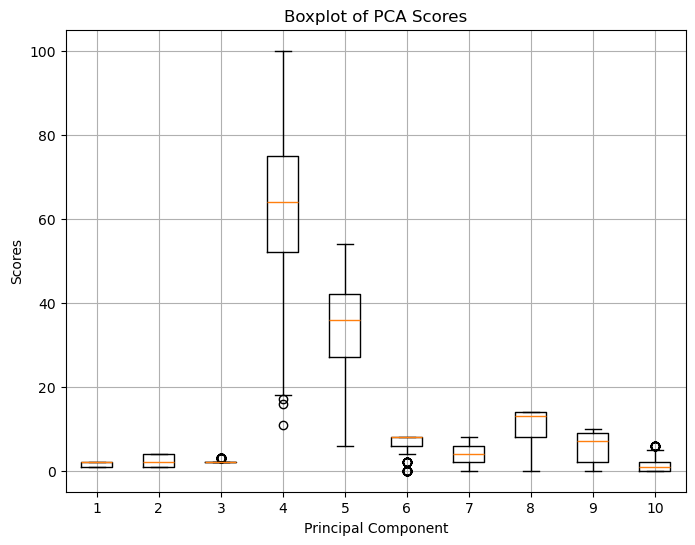

In [5]:
data1 = data.iloc[:, 1:]
Avg = data1.mean(axis=0)
Std = data1.std(axis=0)
data1_centered = (data1 - Avg)/ Std
#标准化
#手动PCA
U, s, Vt = np.linalg.svd(data1_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
#奇异值分解，拿出俩个主成分

In [7]:
m, n = data1.shape

S = np.zeros(data1_centered.shape)
S[:n, :n] = np.diag(s)

In [8]:
np.allclose(data1_centered, U.dot(S).dot(Vt))
#检查误差

True

In [9]:
W2 = Vt.T[:, :2]#选取前俩列
data12D_using_svd = data1_centered.dot(W2)#投影
print(data12D_using_svd)

            0         1
0   -1.600770 -3.533903
1   -2.210886 -3.705526
2   -4.836561 -0.144558
3   -3.316073 -3.236762
4   -4.102177 -3.385191
..        ...       ...
614 -0.657041  0.628999
615 -2.734512  0.216890
616  1.592062  0.690751
617  2.249221  0.232566
618 -4.008548  0.795563

[619 rows x 2 columns]


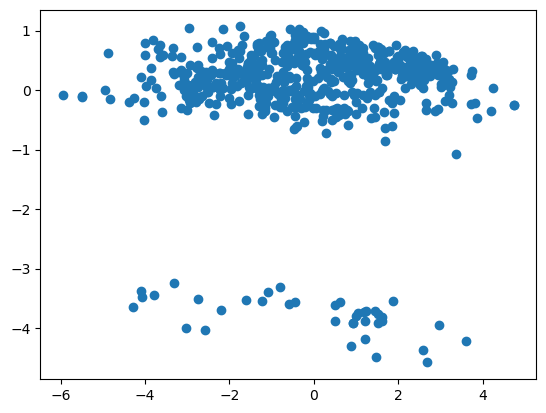

In [10]:
#SVD后
plt.scatter(data12D_using_svd.iloc[:,0], data12D_using_svd.iloc[:,1])

In [11]:
#用sklearn来PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#降维后数据
data12D = pca.fit_transform(data1_centered)

In [12]:
np.allclose(data12D, -data12D_using_svd)#检查误差

True

In [13]:
pca.explained_variance_ratio_

array([0.43910816, 0.11908378])

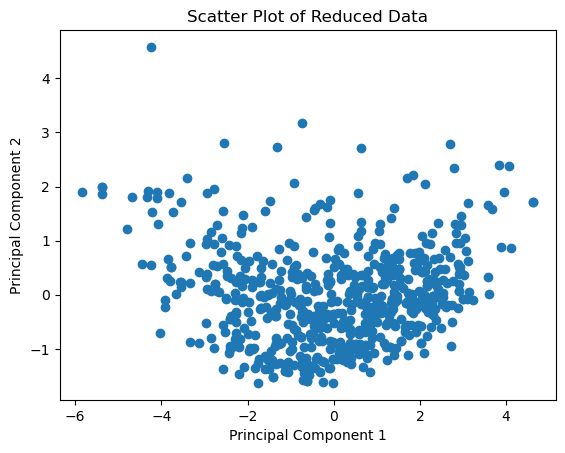

array([0.53230234, 0.11372842])

In [11]:
#尝试从第五列开始
data2 = data[[ 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
Avg = data2.mean(axis=0)
Std = data2.std(axis=0)
data2_centered = (data2 - Avg)/ Std

U, s, Vt = np.linalg.svd(data2_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
m, n = data2.shape

S = np.zeros(data2_centered.shape)
S[:n, :n] = np.diag(s)
np.allclose(data2_centered, U.dot(S).dot(Vt))
W2 = Vt.T[:, :2]
data22D_using_svd = data2_centered.dot(W2)
plt.scatter(data22D_using_svd.iloc[:, 0], data22D_using_svd.iloc[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Reduced Data')
plt.show()
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data22D = pca.fit_transform(data2_centered)
np.allclose(data22D, -data22D_using_svd)
pca.explained_variance_ratio_


In [22]:
1 - pca.explained_variance_ratio_.sum()

0.4566393213036404

In [23]:
np.square(s) / np.square(s).sum()#计算方差比

array([4.14792941e-01, 1.28567737e-01, 1.07715683e-01, 8.49056396e-02,
       7.60743720e-02, 7.04895837e-02, 6.27480579e-02, 5.46526108e-02,
       5.33744678e-05])

Text(0, 0.5, 'Explained Variance')

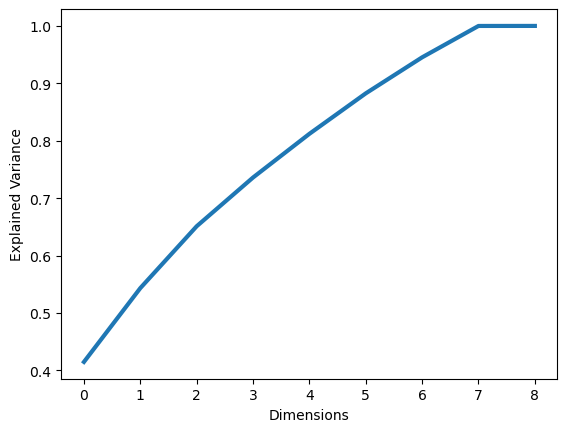

In [24]:
pca2 = PCA()
data2_new=pca2.fit_transform(data2_centered)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 主成分数量的变化的影响

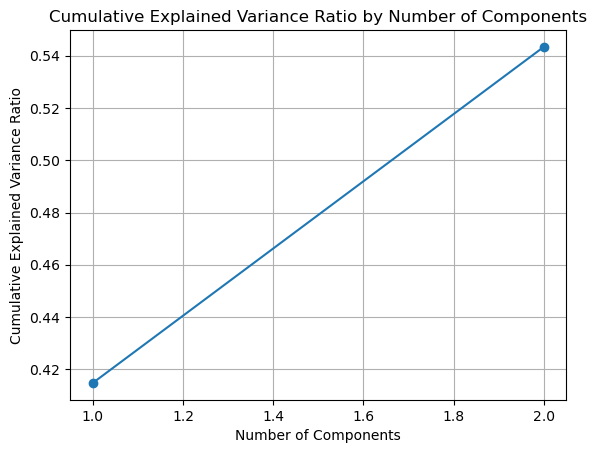

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计解释方差比例
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 另一种方式绘制累计解释方差比例图
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

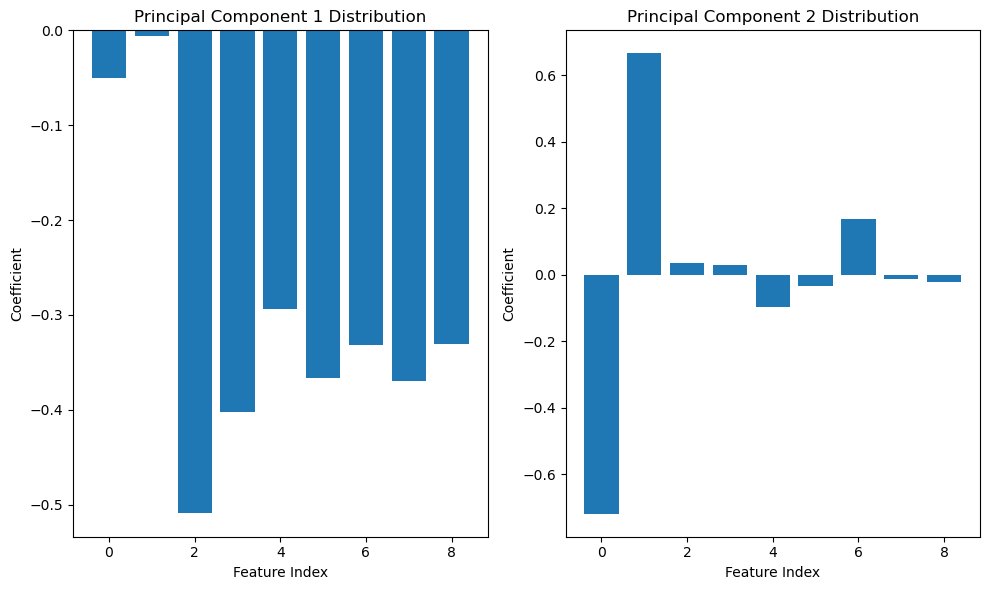

In [26]:
# 获取每个主成分的系数
components = pca.components_

# 绘制每个主成分的分布图
plt.figure(figsize=(10, 6))
for i in range(components.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.bar(range(len(components[i])), components[i])
    plt.title(f'Principal Component {i+1} Distribution')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()
#特征对主成分的贡献


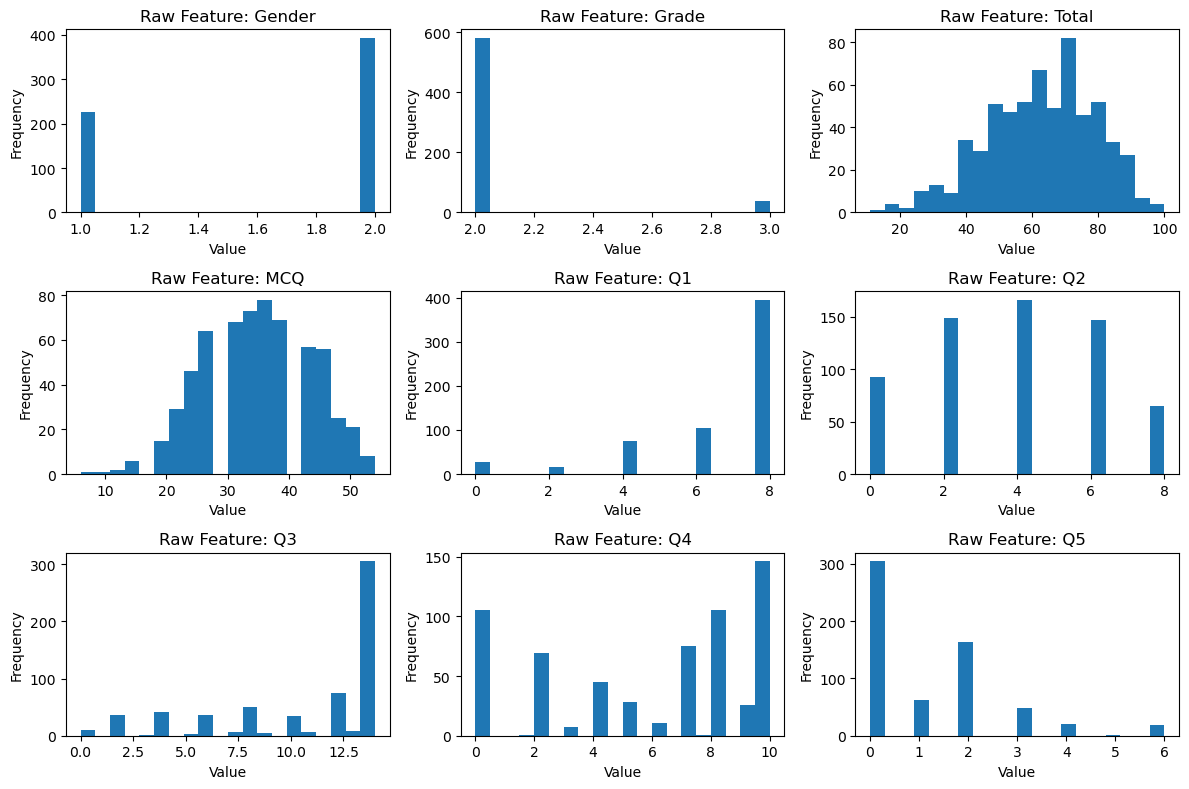

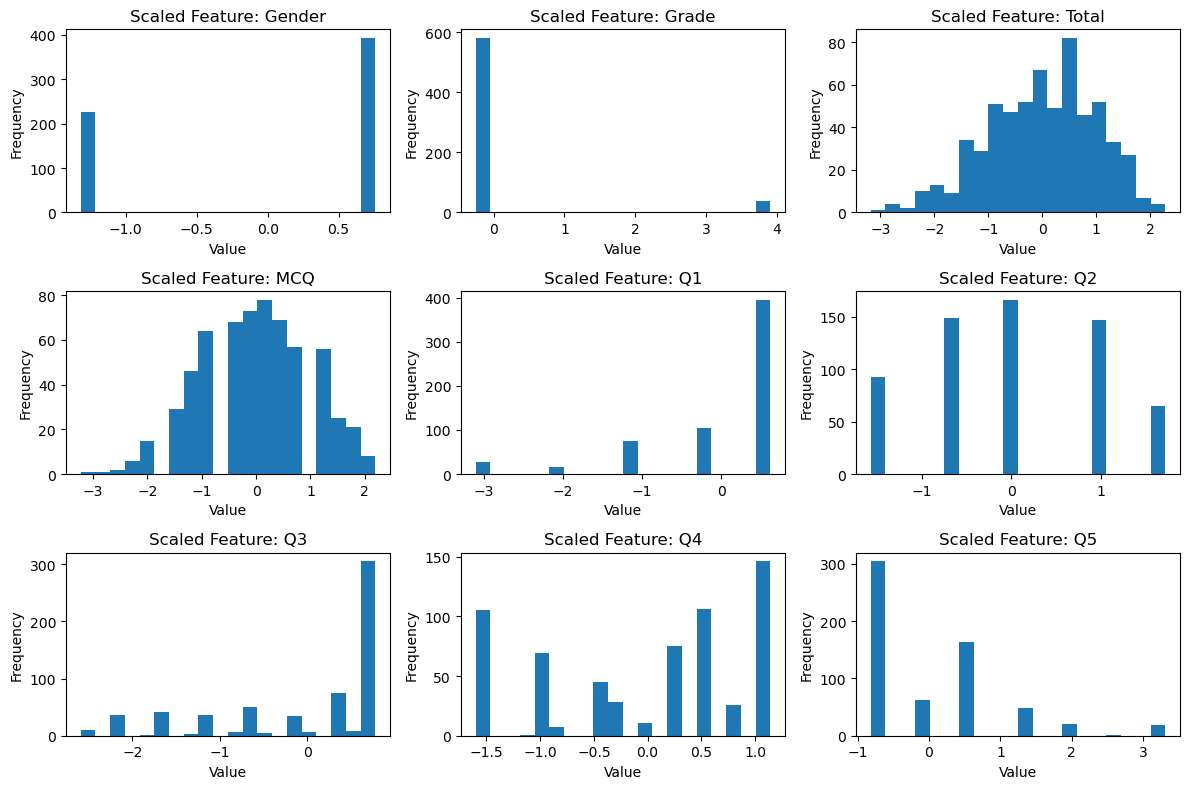

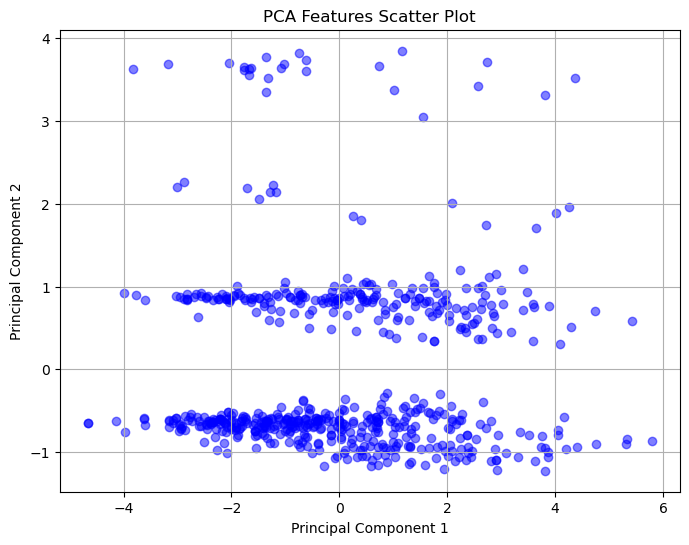

ValueError: Shape of passed values is (619, 11), indices imply (619, 3)

<Figure size 1200x800 with 0 Axes>

In [33]:
# 可视化原始特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data2.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(data[feature], bins=20)
    plt.title(f'Raw Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化标准化特征
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data2_centered)
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data2.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(scaled_features[:, i], bins=20)
    plt.title(f'Scaled Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化PCA特征
plt.figure(figsize=(8, 6))
plt.scatter(data22D[:, 0], data22D[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Features Scatter Plot')
plt.grid(True)
plt.show()

# 可视化结果特征
plt.figure(figsize=(12, 8))
# 重新投影PCA降维后的数据到原始特征空间
resulting_features =  np.hstack((data22D, data2_centered))
resulting_features_df = pd.DataFrame(resulting_features, columns=['Feature1', 'Feature2', ...])
for i, feature in enumerate(resulting_features_df.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(resulting_features[feature], bins=20)
    plt.title(f'Your Resulting Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



The output shape of TSNE method:  (619, 2)


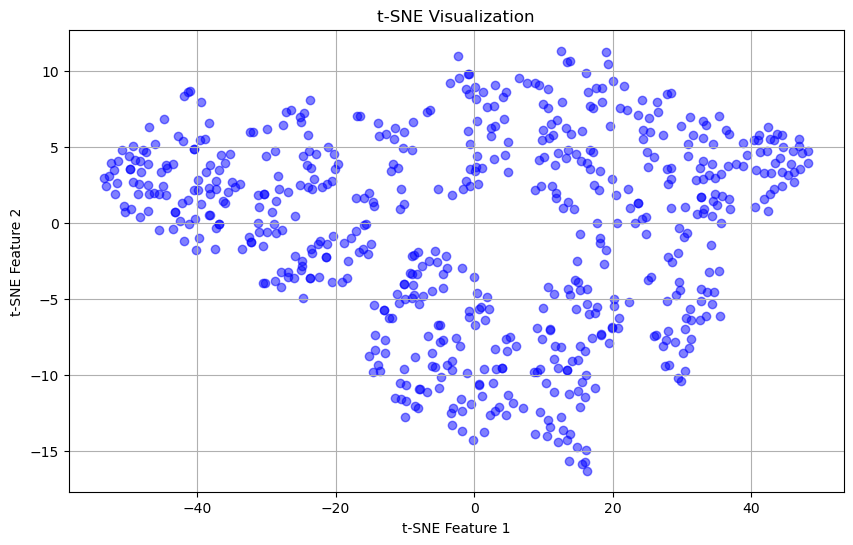

In [37]:
# 使用TSNE进行降维
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42)
data2_reduced_tsne = tsne.fit_transform(data2)
print('The output shape of TSNE method: ', data2_reduced_tsne.shape)

# 可视化降维后的数据
plt.figure(figsize=(10, 6))
plt.scatter(data2_reduced_tsne[:, 0], data2_reduced_tsne[:, 1], c='b', alpha=0.5)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization')
plt.grid(True)
plt.show()